#  un  TSP simple (trop?)

TSP: traveling salesman problem consiste a relier N points par un cycle hamiltonien
dont la somme des distances est minimale.
On ne considere que de spoints sur un plan

Chaque point est visite une fois et une seule.

Un point s

## Les sommets

Un sommet du graphe est represente par un tuple de deux coordonnees (x,y)

In [1]:
P1 = (1, 2)
print('le point de coordonnes x={0}, y={1} est represente par {2}'.format(1,2, (1,2)))

le point de coordonnes x=1, y=2 est represente par (1, 2)


## Distance

Une distance est une fonction qui prend deux sommets en argument et retourne un nombre (flottant).
Un example particulier est la distance euclidienne:


In [2]:
import math # pour sqrt
def distance_euclide(sommet1, sommet2):
    # distance euclidienne
    # les sommets sont des tuples (x,y)
    x1, y1 = sommet1
    x2, y2 = sommet2
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

# une autre distance...

def distance_manhattan(sommet1, sommet2):
    x1, y1 = sommet1
    x2, y2 = sommet2
    return abs(x2-x1) + abs(y2-y1)

p1 = (1,2)
p2 = (3,4)
print('La distance euclidienne entre {0} et {1} vaut {2:.5f}'.format(p1, p2, distance_euclide(p1, p2)))
print('La distance manhattan entre {0} et {1} vaut {2:.5f}'.format(p1, p2, distance_manhattan(p1, p2)))

La distance euclidienne entre (1, 2) et (3, 4) vaut 2.82843
La distance manhattan entre (1, 2) et (3, 4) vaut 4.00000


## Les chemins

un chemin est une liste ordonnee de sommets, qui contient tous les sommets du graphe de depart.
Le dernier sommet est suppose lie au premier pour former un _cycle_.

La longueur d'un cycle se calcule comme la somme des distance entre un point et son suivant, sans oublier le dernier arc entre le dernier point et le premier

In [3]:
# un graphe etant donne sous forme de liste, peut etre aussi interprete comme un chemin
# en general ce n est pas le chemin optimal!

# pour calculer la longueur d un chemin, on passe la fonction distance en argument
# euclide n est pas la seule!

def distance_chemin(sommets, distfn=distance_euclide):
    """ calcule le poids affecté à une chaîne de sommets """
    nb_sommets = len(sommets)
    Poids_Temp = 0
    for k in range(nb_sommets - 1):
        Poids_Temp += distfn(sommets[k], sommets[k + 1])
    return Poids_Temp + distfn(sommets[-1], sommets[0])  # pour boucler le cycle

In [4]:
# un exemple de graphe
g9 = [[0, 0], [100, 100], [0, 100], [100, 0], [50, 50], [75, 15], [75, 35], [20, 40], [50, 20]]

print("- le graphe contient {0} points".format(len(g9)))
print("- longueur initiale = {0}".format(distance_chemin(g9)))

- le graphe contient 9 points
- longueur initiale = 661.6989828404081


# Un algorithme naif

on genere tous les chemins possibles, avec leur longueur.
On retourne celui qui a la plus petite longueur

In [5]:
# generation des permutations de (n-1) indices

def Liste_Permutees(n):
    # n est un nombre de sommets
    # on retourne les permutations des n-1 suivants.
    verbose = False
    if verbose:
        print("--> entre dans permut n={0}".format(n))
    if n == 2:
        if verbose:
            print("<-- sortie de permut n={0}, p={1}".format(n, [[0]]))
        return [[0]]
    else:
        Liste_Temp = []
        prec = Liste_Permutees(n - 1)
        for L in prec:  # on le fait par récursivité !!!
            for k in range(n - 2):
                Liste_L = L.copy()  # pour le pas modifier la liste L
                Liste_L.insert(k, n - 2)    # on insère en place k l'entier n
                Liste_Temp.append(Liste_L)  # on met en mémoire
            Liste_Temp.append(L + [n - 2])  # on rajoute la liste où n est en dernière position
        if verbose:
            print("<-- sortie de permut n={0}, p={1}".format(n, Liste_Temp))
        return Liste_Temp
    
def tsp1(sommets):
    """ implémente l'algorithme de recherche de la trajectoire minimale 
    en comparant tous les chemins """
    nb_sommets = len(sommets)
    # on calcule une distance initiale
    Premier_Sommet, sommets_Suivants = sommets[0], sommets[1:]
    distance_mini = distance_chemin(sommets)
    chemin_mini = sommets

    for Liste in Liste_Permutees(nb_sommets):
        chemin_possible = [Premier_Sommet] + [sommets_Suivants[k] for k in Liste]
        Poids_Chemin = distance_chemin(chemin_possible)
        if Poids_Chemin < distance_mini:
            distance_mini = Poids_Chemin
            chemin_mini = chemin_possible
    # on retourne un tuple: liste de N sommets (le chemin) + la distance (un nombre)
    return chemin_mini, distance_mini

In [6]:
# si nb_sommets est 3 et si on fixe le premier sommet,
# on doit permuter les nb_sommets-1 suivants soit 2
Liste_Permutees(3)

[[1, 0], [0, 1]]

In [7]:
# test sur g9
chemin, distance = tsp1(g9)
print("* distance min={0:.2f}, chemin={1}".format(distance, chemin))

* distance min=459.35, chemin=[[0, 0], [50, 20], [75, 15], [100, 0], [75, 35], [50, 50], [100, 100], [0, 100], [20, 40]]


# Analyse de l algorithme

Pour anlyser l algorithme, on va generer des graphes aleatoires,
c est a dire des listes de tuples de coordonnees entre 0 et une taille donnee.
On utilisela distribution aleatoire `uniform` qui est dans le module `random`.


In [8]:
from random import uniform

def sommets_graphe_aleatoire(nb, taille=100):
    # retourne nb sommets aleatoires dans une grille de taille `taille` (defaut 100)
    return [ (uniform(0, taille), uniform(0, taille)) for _ in range(nb)]

na = 4
print('- un graphe a {0} points aleatoires: {1}'.format(na, sommets_graphe_aleatoire(na)))

- un graphe a 4 points aleatoires: [(4.581994919774923, 62.44825107582596), (33.00301895482921, 24.106781929207234), (46.68212911084593, 49.91354964806427), (21.208443849742764, 27.758942707019685)]


## un peu de graphique


In [9]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("matplotlib not found. essayer 'pip install matplotlib'")

# cette commande magique inclut les diagrammes dans le notebook
%matplotlib inline

In [10]:
def print_graphe(Sommets, chemin_mini=None, taille=100):
    import matplotlib.pyplot as plt

    def plot_arrow(s1, s2, color, f=.5):
        x0, y0 = s1
        x1, y1 = s2
        line = plt.plot([x0, x1], [y0, y1], color=color)

        f = max(f, .0001)
        dx = f * (x1 - x0)
        dy = f * (y1 - y0)
        a = plt.arrow(x0, y0, dx, dy,
                      color=color, head_width=5, head_length=6)

    plt.figure(figsize=(10,6))
    marge = 10
    plt.axis([-marge, taille+marge, -marge, taille+marge])

    plt.scatter([s[0] for s in Sommets], [s[1] for s in Sommets], s=100, color="red", marker="s")
    nb_sommets = len(Sommets)
    
    # le chemin affiche est soit le mini soit le Sommets initial
    chemin = chemin_mini or Sommets
    
    for k in range(nb_sommets-1):
        plot_arrow(chemin[k], chemin[k+1], color='blue')
    plot_arrow(chemin[-1], chemin[0], color='blue')
    # plt.plot([Chemin_Mini[k][0] for k in range(nb_sommets)] + [Chemin_Mini[0][0]],
    #          [Chemin_Mini[k][1] for k in range(nb_sommets)] + [Chemin_Mini[0][1]],
    #          color="blue", linestyle="-")

    plt.show()


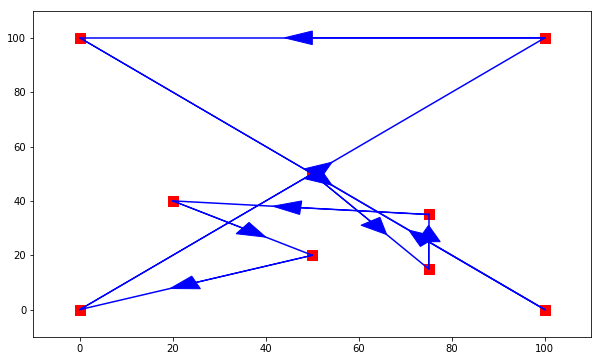

- longueur initiale = 661.6989828404081


In [11]:
print_graphe(g9)
print("- longueur initiale = {0}".format(distance_chemin(g9)))

In [12]:
chemin_g9, distance_g9 = tsp1(g9)
print('- chemin optimal g9, distance: {1}, chemin: {0}'.format(chemin_g9, distance_g9))

- chemin optimal g9, distance: 459.3454817949932, chemin: [[0, 0], [50, 20], [75, 15], [100, 0], [75, 35], [50, 50], [100, 100], [0, 100], [20, 40]]


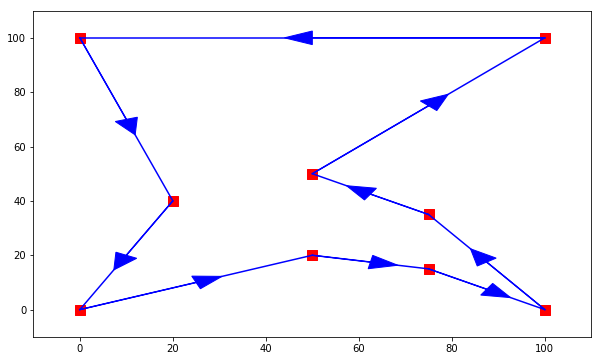

In [13]:
print_graphe(g9, chemin_g9)

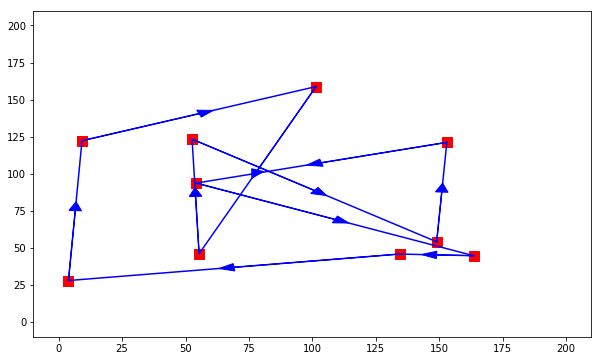

In [14]:
# un graphe aleatoire a dix points
g10a = sommets_graphe_aleatoire(10, 200)
print_graphe(g10a, chemin_mini=None, taille=200)

In [15]:
chemin_g10a, distance_g10a = tsp1(g10a)
print('- chemin optimal g10a, distance: {1}, chemin: {0}'.format(chemin_g10a, distance_g10a))

- chemin optimal g10a, distance: 546.6667842235565, chemin: [(163.6414018104648, 44.69543588095266), (153.03246008325885, 121.15388528217865), (101.47714261092734, 158.78360364453417), (52.58412450267043, 123.33570432204743), (54.169829393716796, 93.67648531125543), (9.197951774773049, 122.25366360331846), (3.854459980237279, 27.953458740099624), (55.36292151233218, 46.068363391929324), (134.39187527507724, 45.812687796163964), (149.0220105136933, 54.09323234469026)]


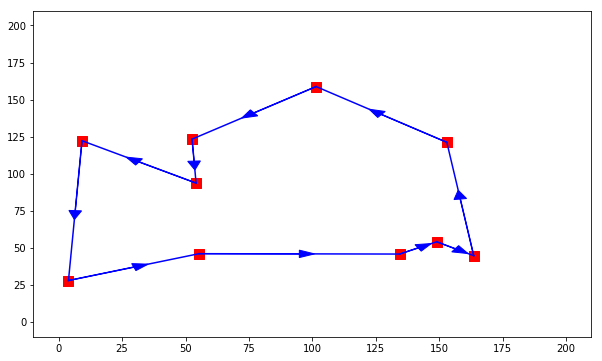

In [16]:
print_graphe(g10a, chemin_g10a, taille=200)

In [17]:
import time

def chrono_tsp1(Sommets):
    print('-> start chrono tsp, nb sommets={0}'.format(len(Sommets)))
    t1 = time.clock()
    chemin, distance = tsp1(Sommets)
    t2 = time.clock()
    print('<- end chrono tsp, nb sommets={0}, time={1}'.format(len(Sommets), (t2-t1)))
    return (t2-t1), chemin, distance

-> start chrono tsp, nb sommets=2
<- end chrono tsp, nb sommets=2, time=3.0203598697653433e-05
-> start chrono tsp, nb sommets=3
<- end chrono tsp, nb sommets=3, time=3.662186338715401e-05
-> start chrono tsp, nb sommets=4
<- end chrono tsp, nb sommets=4, time=7.928444654226041e-05
-> start chrono tsp, nb sommets=5
<- end chrono tsp, nb sommets=5, time=0.000292597362260949
-> start chrono tsp, nb sommets=6
<- end chrono tsp, nb sommets=6, time=0.0016898913463307963
-> start chrono tsp, nb sommets=7
<- end chrono tsp, nb sommets=7, time=0.010292631341286551
-> start chrono tsp, nb sommets=8
<- end chrono tsp, nb sommets=8, time=0.049548248549939444
-> start chrono tsp, nb sommets=9
<- end chrono tsp, nb sommets=9, time=0.3822329596015379
-> start chrono tsp, nb sommets=10
<- end chrono tsp, nb sommets=10, time=3.6876672288311454
-> start chrono tsp, nb sommets=11
<- end chrono tsp, nb sommets=11, time=40.05473798189371
-> start chrono tsp, nb sommets=12
<- end chrono tsp, nb sommets=12,

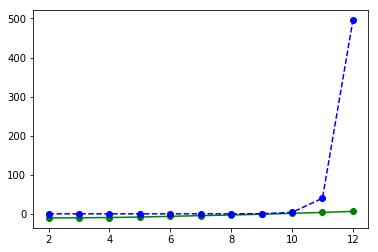

In [19]:
def calcule_tsp(p):
    X = [k + 2 for k in range(p)]
    Y = [chrono_tsp1(sommets_graphe_aleatoire(k))[0] for k in X]
    Z = list(map(math.log, Y))  # échelle logarithmique en ordonnées
    return X,Y,Z

def plot_times(X,Y,Z):
    import matplotlib.pyplot as plt
    """ trace la suite des temps de calcul """
    plt.figure()
    # nb de points
    plt.plot(X, Z, color="green", marker="o", linestyle="-")
    plt.plot(X, Y, color="blue", marker="o", linestyle="--")
    plt.show()
    
x11, y11, z11 = calcule_tsp(11)
plot_times(x11, y11, z11)